In [36]:
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Leer txt en csv para y revisar que información contiene**

In [37]:
archivo_txt = pd.read_csv("./data_txt_clean.txt", sep= ";")
archivo_txt.head(2)

,index,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
0,0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,NaN


# **Leer csv para revisar su contenido**

In [38]:
archivo_csv = pd.read_csv("./exported_db_data.csv")
archivo_csv.head(2)

,index,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
0,0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Leer xml para revisar su contenido**

In [39]:
archivo_xml = pd.read_csv("./data_xml_clean.xml")
archivo_xml.head()

,<data>
0,<row>
1,<level_0>0</level_0>
2,<index>0</index>
3,<time>910</time>
4,<age>50-54</age>


<font color=green>**Extraer información de xml para mejor adaptación a Csv, creando esta función para los valores de edad, time, gender e index**</font>

In [40]:

tree = ET.parse("data_xml_clean.xml")
root = tree.getroot()

edad = []
time = []
gender = []
index = []

for child in root:
    for subchild in child:
        if subchild.tag == "age":
            edad.append(subchild.text)
        elif subchild.tag == "time":
            time.append(subchild.text)
        elif subchild.tag == "gender":
            gender.append(subchild.text)
        elif subchild.tag == "index":
            index.append(subchild.text)



<font color=green>**Crear un DF haciendo ZIP a nuestras listas.**</font>

In [41]:
df_xml = pd.DataFrame(list(zip(index,edad,time,gender)), columns = ["index","edad","time", "gender"])
df_xml

,index,edad,time,gender
0,0,50-54,910,Man
1,1,50-54,784,Man
2,2,22-24,924,Man
3,3,45-49,575,Man
4,4,45-49,781,Man
...,...,...,...,...
25968,25968,30-34,1756,Man
25969,25969,22-24,253,Man
25970,25970,50-54,494,Man
25971,25971,45-49,277,Man


# **Leer nuevo archivo subido (kaggle) csv**

In [42]:
archivo_kaggle = pd.read_csv("data_remaning_kaggle.csv")
archivo_kaggle.head(2)

,Unnamed: 0,index,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [43]:
#Queremos ver cuantas columnas hay en este archivo
archivo_kaggle.columns

Index(['Unnamed: 0', 'index', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3',
       'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER', 'Q19_Part_1',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=214)

# Unión archivos


<font color=green>**Unir los 4 archivos ( txt, csv, xml, kaggle.csv) en un CSV único.**</font>

In [44]:
concat_archivos = pd.concat([df_xml, archivo_txt, archivo_csv, archivo_kaggle], axis=1)
concat_archivos

,index,edad,time,gender,index,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,index,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Unnamed: 0,index,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,50-54,910,Man,0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,

In [45]:
#Comprobamos que la suma de las columnas coinciden con las columnas totales después de haber hecho la unión.

print(archivo_txt.shape)
print(df_xml.shape)
print(archivo_csv.shape)
print(archivo_kaggle.shape)

(25973, 27)
(25973, 4)
(25973, 18)
(25973, 214)


In [46]:
#Eliminamos la columna "index" , cada archivo contiene una y hemos decidido eliminarlos primero.
del concat_archivos["index"]
print(concat_archivos.columns)

Index(['edad', 'time', 'gender', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q11', 'Q13',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=259)


# **Una vez unidos en un solo DF vamos a guardar este nuevo CSV con enombre union_3_archivos**

In [47]:
concat_archivos.to_csv("union_4_archivos.csv")

# **Hacemos una copia en este momento donde comenzamos a trabajar con la unión** 💩

In [48]:
df = concat_archivos.copy()

# **Visualizamos qué información tenemos en nuestro archivo ya unido para dedicir qué columnas nos interesan**

In [49]:
pd.options.display.max_columns = None
df.head(3)

,edad,time,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Unnamed: 0,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,910,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [50]:
#Calculamos el % de datos nulos de cada columnas para hacernos una idea de la información que contiene

# otro metodo: df.stb.missing([df.columns])

nulos = (df.isnull().sum()/ len(df)*100).sort_values(ascending=False) #ordenamos de forma ascendente para comprobar si existen 100% nulos en algunas columnas.
porcentaje_isnull = np.round(nulos, decimals = 2) #redondeamos a 2 decimales
porcentaje_isnull


Q30_B_Part_3    100.0
Q30_B_Part_2    100.0
Q30_B_Part_1    100.0
Q30_B_Part_5    100.0
Q30_B_Part_6    100.0
                ...  
Unnamed: 0        0.0
Q5                0.0
Q6                0.0
time              0.0
edad              0.0
Length: 259, dtype: float64

# **Algunas ideas para borrar - conservar qué datos nos interesan**

In [51]:
# Este bucle está pensado para borrar todas aquellas columnas, cuyo porcentaje de nulos sea mayor de 90%

# for index, value in porcentaje_isnull.items():
#     try:
#         if value >= 90:
#             del df[index]
#         else:
#             pass
#     except KeyError:
#         pass 

# df.head(2)


# **Decidimos las columnas con las que finalmente vamos a trabajar**

In [52]:
#En primer lugar comenzamos a pensar en esta forma de ejecutar la eliminación de las columnas no deseadas para el análisis.

# col_a_eliminar = ['Q8', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5',
#        'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10',
#        'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13', 'Q10_Part_14','Q10_Part_15', 'Q10_Part_16','Q10_OTHER', 'Q12', 
#        'Q13', 'Q17', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3','Q18_Part_4','Q18_Part_5','Q18_Part_6','Q18_OTHER', 
#        'Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5','Q19_OTHER', 'Q23', 'Q24', 'Q26', 'Q27_A_Part_1',
#        'Q27_A_Part_2','Q27_A_Part_3','Q27_A_Part_4','Q27_A_Part_5','Q27_A_Part_6','Q27_A_Part_7','Q27_A_Part_8',
#        'Q27_A_Part_9','Q27_A_Part_10','Q27_A_Part_11','Q27_A_OTHER', 'Q28', 'Q29_A_Part_1','Q29_A_Part_2','Q29_A_Part_3',
#        'Q29_A_Part_4','Q29_A_OTHER', 'Q33', 'Q34', 'Q36_A_Part_1','Q36_A_Part_2',	'Q36_A_Part_3', 'Q36_A_Part_4', 
#        'Q36_A_Part_5', 'Q36_A_Part_6','Q36_A_Part_7','Q36_A_OTHER', 'Q37_A_Part_1', 'Q37_A_Part_2', 'Q37_A_Part_3', 
#        'Q37_A_Part_4','Q37_A_Part_5','Q37_A_Part_6','Q37_A_Part_7','Q37_A_OTHER','Q38_A_Part_1','Q38_A_Part_2',
#        'Q38_A_Part_3','Q38_A_Part_4','Q38_A_Part_5','Q38_A_Part_6','Q38_A_Part_7','Q38_A_Part_8','Q38_A_Part_9',
#        'Q38_A_Part_10','Q38_A_Part_11','Q38_A_OTHER', 'Q27_B_Part_1','Q27_B_Part_2','Q27_B_Part_3', 'Q27_B_Part_4',
#        'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 	'Q27_B_Part_11','Q27_B_OTHER',	
#        'Q29_B_Part_1','Q29_B_Part_2','Q29_B_Part_3', 'Q29_B_Part_4', 'Q29_B_OTHER','Q30_B_Part_1', 'Q30_B_Part_2','Q30_B_Part_3',	
#        'Q30_B_Part_4', 'Q30_B_Part_5', 'Q30_B_Part_6','Q30_B_Part_7','Q30_B_OTHER', 'Q31_B_Part_1', 'Q31_B_Part_2','Q31_B_Part_3',	
#        'Q31_B_Part_4','Q31_B_Part_5','Q31_B_Part_6','Q31_B_Part_7','Q31_B_Part_8','Q31_B_Part_9','Q31_B_OTHER','Q32_B_Part_1',	
#        'Q32_B_Part_2','Q32_B_Part_3','Q32_B_Part_4','Q32_B_Part_5','Q32_B_Part_6','Q32_B_Part_7','Q32_B_Part_8'	,'Q32_B_Part_9',	
#        'Q32_B_Part_10','Q32_B_Part_11', 'Q32_B_Part_12','Q32_B_Part_13','Q32_B_Part_14','Q32_B_Part_15',	'Q32_B_Part_16','Q32_B_Part_17',       
#        'Q32_B_Part_18', 'Q32_B_Part_19','Q32_B_Part_20','Q32_B_OTHER'	,'Q34_B_Part_1','Q34_B_Part_2','Q34_B_Part_3','Q34_B_Part_4',	
#        'Q34_B_Part_5','Q34_B_Part_6','Q34_B_Part_7','Q34_B_Part_8','Q34_B_Part_9','Q34_B_Part_10'	,'Q34_B_Part_11','Q34_B_Part_12',	
#        'Q34_B_Part_13','Q34_B_Part_14','Q34_B_Part_15','Q34_B_Part_16','Q34_B_OTHER','Q36_B_Part_1','Q36_B_Part_2','Q36_B_Part_3',	
#        'Q36_B_Part_4','Q36_B_Part_5','Q36_B_Part_6','Q36_B_Part_7','Q36_B_OTHER','Q37_B_Part_1',	'Q37_B_Part_2','Q37_B_Part_3',	
#        'Q37_B_Part_4','Q37_B_Part_5','Q37_B_Part_6','Q37_B_Part_7','Q37_B_OTHER','Q38_B_Part_1','Q38_B_Part_2',	'Q38_B_Part_3',	
#        'Q38_B_Part_4','Q38_B_Part_5','Q38_B_Part_6','Q38_B_Part_7','Q38_B_Part_8','Q38_B_Part_9',	'Q38_B_Part_10','Q38_B_Part_11',	
#        'Q38_B_OTHER','Q31_A_Part_1','Q31_A_Part_2','Q31_A_Part_3','Q31_A_Part_4','Q31_A_Part_5','Q31_A_Part_6','Q31_A_Part_7','Q31_A_Part_8',
#        'Q31_A_Part_9',,'Q31_A_OTHER','Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_5','Q39_Part_7','Q39_Part_8','Q39_Part_9','Q39_OTHER']


# df_borrado = df.drop(columns= col_a_eliminar, axis=1)

In [53]:
#Como segunda y definitiva alternativa finalmente ejecutamos con este proceso.

columnas_preferidas= ["edad","gender", "Q3","Q4","Q5","Q6", "Q7", "Q9","Q10_Part_1",
                      "Q10_Part_2","Q11","Q14","Q15","Q16","Q20", "Q21", "Q22", "Q25",'Q32', 
                      "Q34", 'Q39_Part_4', 'Q39_Part_6','Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 
                      'Q40_Part_4','Q40_Part_5','Q40_Part_6', 'Q40_Part_7', 'Q40_Part_8','Q40_Part_9', 
                      'Q40_Part_10', 'Q40_Part_11','Q40_OTHER', 'Q41', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 
                      'Q42_Part_4','Q42_Part_5', 'Q42_Part_6','Q42_Part_7','Q42_Part_8', 'Q42_Part_9', 'Q42_Part_10', 
                      'Q42_Part_11', 'Q42_OTHER']

#Utilizando este bucle vamos a conservar nuestras "columnas preferidas" y eliminar todas las demás.

for col in df.columns:
    if col not in columnas_preferidas:
        del df[col]
    else:
        pass

In [54]:
df.columns

Index(['edad', 'gender', 'Q3', 'Q4', 'Q5', 'Q6', 'Q11', 'Q15', 'Q20', 'Q21',
       'Q22', 'Q25', 'Q41', 'Q7', 'Q9', 'Q14', 'Q16', 'Q32', 'Q34',
       'Q10_Part_1', 'Q10_Part_2', 'Q39_Part_4', 'Q39_Part_6', 'Q40_Part_1',
       'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5', 'Q40_Part_6',
       'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10', 'Q40_Part_11',
       'Q40_OTHER', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 'Q42_Part_4',
       'Q42_Part_5', 'Q42_Part_6', 'Q42_Part_7', 'Q42_Part_8', 'Q42_Part_9',
       'Q42_Part_10', 'Q42_Part_11', 'Q42_OTHER'],
      dtype='object')

In [55]:
#Comprobamos que se ha ejecutado correctamente, el numero de columnas se ha reducido hasta 48, que son con las que vamos a trabajar.
df.columns.shape

(47,)

In [56]:
df.shape

(25973, 47)

# **Hacemos nueva copia del Data frame tras eliminación de las columnas**

In [57]:
df_new= df.copy()

# **Renombrar las columnas**

In [58]:
df_new.head(4)

,edad,gender,Q3,Q4,Q5,Q6,Q11,Q15,Q20,Q21,Q22,Q25,Q41,Q7,Q9,Q14,Q16,Q32,Q34,Q10_Part_1,Q10_Part_2,Q39_Part_4,Q39_Part_6,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",PostgreSQL,None,NaN,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,A laptop,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,"MySQL , MongoDB",None,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",5-10 years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999","Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras",NaN,NaN,NaN,Colab Notebooks,NaN,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [59]:
df_new.columns

Index(['edad', 'gender', 'Q3', 'Q4', 'Q5', 'Q6', 'Q11', 'Q15', 'Q20', 'Q21',
       'Q22', 'Q25', 'Q41', 'Q7', 'Q9', 'Q14', 'Q16', 'Q32', 'Q34',
       'Q10_Part_1', 'Q10_Part_2', 'Q39_Part_4', 'Q39_Part_6', 'Q40_Part_1',
       'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5', 'Q40_Part_6',
       'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10', 'Q40_Part_11',
       'Q40_OTHER', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 'Q42_Part_4',
       'Q42_Part_5', 'Q42_Part_6', 'Q42_Part_7', 'Q42_Part_8', 'Q42_Part_9',
       'Q42_Part_10', 'Q42_Part_11', 'Q42_OTHER'],
      dtype='object')

In [60]:
df_new.rename(columns= {"edad":"edad","gender":"genero","Q3":"pais","Q4":"educacion","Q5":"perfil_profesional",
                                    "Q6":"experiencia_programando", "Q7":"Lenguajes_habituales", "Q9":"Entorno_desarrollo",
                                    "Q10_Part_1":"notebooks_Kaggle", "Q10_Part_2":"notebooks_colab","Q11":"herramientas_trabajo", 
                                    "Q14":"Bibliotecas_visualización", "Q15":"año_uso_machine_learning", 
                                    "Q16":"herramientas_machine_learning", "Q20":"Industria_actual","Q21":"Tamaño_compañía", "Q22":"Trabajadores_DataScience", 
                                    "Q25":"Salario", "Q32":"Programas_Big_Data","Q34":"Herramientas_BI",'Q39_Part_4':"publicaciones_github", 'Q39_Part_6':"publicaciones_kaggle","Q40_Part_1":"Plat_Coursera","Q40_Part_2":"Plat_EdX",
                                    "Q40_Part_3":"Plat_Kaggle","Q40_Part_4":"Plat_Datacamp","Q40_Part_5":"Plat_Fast.AI","Q40_Part_6":"Plat_Udacity","Q40_Part_7":"Plat_Udemy",
                                    "Q40_Part_8":"Plat_Linkedinlearning","Q40_Part_9":"Plat_CloudCertification","Q40_Part_10":"Plat_UniversityCourses","Q40_Part_11":"Plat_Ninguno",
                                    "Q40_OTHER":"Plat_Otros",'Q41':'Herramienta_analisis_datos',
                                    'Q42_Part_1':'RRSS_twitter', 'Q42_Part_2':'RRSS_email/newsletters', 'Q42_Part_3':'RRSS_reddit', 'Q42_Part_4':'RRSS_kaggle',
                                    'Q42_Part_5':'RRSS_forums', 'Q42_Part_6':'RRSS_yotube', 'Q42_Part_7':'RRSS_podcast', 'Q42_Part_8':'RRSS_blogs', 'Q42_Part_9':'RRSS_journal',
                                    'Q42_Part_10':'RRSS_slackcommunity', 'Q42_Part_11':'RRSS_none', 'Q42_OTHER':'RRSS_others'},inplace=True)

In [61]:
df_new.head(1)

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,Industria_actual,Tamaño_compañía,Trabajadores_DataScience,Salario,Herramienta_analisis_datos,Lenguajes_habituales,Entorno_desarrollo,Bibliotecas_visualización,herramientas_machine_learning,Programas_Big_Data,Herramientas_BI,notebooks_Kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,Plat_Coursera,Plat_EdX,Plat_Kaggle,Plat_Datacamp,Plat_Fast.AI,Plat_Udacity,Plat_Udemy,Plat_Linkedinlearning,Plat_CloudCertification,Plat_UniversityCourses,Plat_Ninguno,Plat_Otros,RRSS_twitter,RRSS_email/newsletters,RRSS_reddit,RRSS_kaggle,RRSS_forums,RRSS_yotube,RRSS_podcast,RRSS_blogs,RRSS_journal,RRSS_slackcommunity,RRSS_none,RRSS_others
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",PostgreSQL,None,NaN,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


-----

In [62]:
#Prueba el método .explode de pandas para columnas Q40 y las otras con partes. 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html 

In [63]:
# especiales= ['Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_6',
#        'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_11',
#        'Q40_OTHER']

# for column in especiales:
#        df_new[column].replace(np.nan, "no", inplace = True)


In [64]:
# def unir():
    
# for x in especiales:
#     if x == no:
#         del x

#     else:
#         return df["columna_nueva"] = df[especiales].apply()

In [65]:
# import pandas as pd
# from collections import OrderedDict

# data = [['a1', ['b1', 'b2'], ['c1', 'b1'], 'd1'],
#         ['a2', ['b1', 'b1'], ['b3'], 'd2'],
#         ['a3', ['b2'], ['b2', 'b2'], 'd3']]

# df = pd.DataFrame(data=data, columns=['A', 'B', 'C', 'D'])


# def uniques(xs):
#     return list(OrderedDict().fromkeys(xi for x in xs for xi in x))


# df['E'] = df[['B', 'C']].apply(uniques, axis=1)

In [66]:
# #Primero se une , si sale usar peplace para las celdas largas
# df_new['Plataforma_curso'] = df_new[['Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_6',
#        'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_11',
#        'Q40_OTHER']].apply(','.join, axis=1)

In [67]:
# df_new['Plataforma_curso'].split(',')

In [68]:
#despues .explode
# division= df_new.explode("plataforma_curso")

# df = pd.DataFrame({'P': [[2, 3, 4], 'fff', [], [4, 5]], 'Q': 2})
# df.explode('P')

-------

# **Reordenar las columnas**

In [69]:
df_new.columns

Index(['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'Industria_actual', 'Tamaño_compañía',
       'Trabajadores_DataScience', 'Salario', 'Herramienta_analisis_datos',
       'Lenguajes_habituales', 'Entorno_desarrollo',
       'Bibliotecas_visualización', 'herramientas_machine_learning',
       'Programas_Big_Data', 'Herramientas_BI', 'notebooks_Kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'Plat_Coursera', 'Plat_EdX', 'Plat_Kaggle', 'Plat_Datacamp',
       'Plat_Fast.AI', 'Plat_Udacity', 'Plat_Udemy', 'Plat_Linkedinlearning',
       'Plat_CloudCertification', 'Plat_UniversityCourses', 'Plat_Ninguno',
       'Plat_Otros', 'RRSS_twitter', 'RRSS_email/newsletters', 'RRSS_reddit',
       'RRSS_kaggle', 'RRSS_forums', 'RRSS_yotube', 'RRSS_podcast',
       'RRSS_blogs', 'RRSS_journal', 'RRSS_slackcommunity', 'RRSS_none',
       'RRSS_others

# Poner en minusculas todas las columnas del DF

In [70]:

nuevas_columnas = {col: col.lower() for col in df_new.columns}
nuevas_columnas

{'edad': 'edad',
 'genero': 'genero',
 'pais': 'pais',
 'educacion': 'educacion',
 'perfil_profesional': 'perfil_profesional',
 'experiencia_programando': 'experiencia_programando',
 'herramientas_trabajo': 'herramientas_trabajo',
 'año_uso_machine_learning': 'año_uso_machine_learning',
 'Industria_actual': 'industria_actual',
 'Tamaño_compañía': 'tamaño_compañía',
 'Trabajadores_DataScience': 'trabajadores_datascience',
 'Salario': 'salario',
 'Herramienta_analisis_datos': 'herramienta_analisis_datos',
 'Lenguajes_habituales': 'lenguajes_habituales',
 'Entorno_desarrollo': 'entorno_desarrollo',
 'Bibliotecas_visualización': 'bibliotecas_visualización',
 'herramientas_machine_learning': 'herramientas_machine_learning',
 'Programas_Big_Data': 'programas_big_data',
 'Herramientas_BI': 'herramientas_bi',
 'notebooks_Kaggle': 'notebooks_kaggle',
 'notebooks_colab': 'notebooks_colab',
 'publicaciones_github': 'publicaciones_github',
 'publicaciones_kaggle': 'publicaciones_kaggle',
 'Plat_Co

In [71]:
df_new.rename(columns = nuevas_columnas, inplace = True)

In [72]:
df_new.columns

Index(['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'industria_actual', 'tamaño_compañía',
       'trabajadores_datascience', 'salario', 'herramienta_analisis_datos',
       'lenguajes_habituales', 'entorno_desarrollo',
       'bibliotecas_visualización', 'herramientas_machine_learning',
       'programas_big_data', 'herramientas_bi', 'notebooks_kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'plat_coursera', 'plat_edx', 'plat_kaggle', 'plat_datacamp',
       'plat_fast.ai', 'plat_udacity', 'plat_udemy', 'plat_linkedinlearning',
       'plat_cloudcertification', 'plat_universitycourses', 'plat_ninguno',
       'plat_otros', 'rrss_twitter', 'rrss_email/newsletters', 'rrss_reddit',
       'rrss_kaggle', 'rrss_forums', 'rrss_yotube', 'rrss_podcast',
       'rrss_blogs', 'rrss_journal', 'rrss_slackcommunity', 'rrss_none',
       'rrss_others

# Reordenar las columnas

    Estan en un orden correcto , no es necesario reorganizar en nuestro criterio, dejamos muestra de reorganización.

In [73]:
nuevo_orden =['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'Industria_actual', 'Tamaño_compañía',
       'Trabajadores_DataScience', 'Salario', 'Herramienta_analisis_datos',
       'Lenguajes_habituales', 'Entorno_desarrollo',
       'Bibliotecas_visualización', 'herramientas_machine_learning',
       'Programas_Big_Data', 'Herramientas_BI', 'notebooks_Kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'Plat_Coursera', 'Plat_EdX', 'Plat_Kaggle', 'Plat_Datacamp',
       'Plat_Fast.AI', 'Plat_Udacity', 'Plat_Udemy', 'Plat_Linkedinlearning',
       'Plat_CloudCertification', 'Plat_UniversityCourses', 'Plat_Ninguno',
       'Plat_Otros', 'RRSS_twitter', 'RRSS_email/newsletters', 'RRSS_reddit',
       'RRSS_kaggle', 'RRSS_forums', 'RRSS_yotube', 'RRSS_podcast',
       'RRSS_blogs', 'RRSS_journal', 'RRSS_slackcommunity', 'RRSS_none',
       'RRSS_others']

In [74]:
df_new.reindex(columns=nuevo_orden)

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,Industria_actual,Tamaño_compañía,Trabajadores_DataScience,Salario,Herramienta_analisis_datos,Lenguajes_habituales,Entorno_desarrollo,Bibliotecas_visualización,herramientas_machine_learning,Programas_Big_Data,Herramientas_BI,notebooks_Kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,Plat_Coursera,Plat_EdX,Plat_Kaggle,Plat_Datacamp,Plat_Fast.AI,Plat_Udacity,Plat_Udemy,Plat_Linkedinlearning,Plat_CloudCertification,Plat_UniversityCourses,Plat_Ninguno,Plat_Otros,RRSS_twitter,RRSS_email/newsletters,RRSS_reddit,RRSS_kaggle,RRSS_forums,RRSS_yotube,RRSS_podcast,RRSS_blogs,RRSS_journal,RRSS_slackcommunity,RRSS_none,RRSS_others
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scikit-learn , TensorFlow ,Caret",NaN,NaN,NaN,Colab Notebooks,GitHub,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scikit-learn,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,A laptop,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",5-10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scikit-learn , TensorFlow ,Keras",NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,India,Doctoral degree,Other,< 1 years,"A cloud computing platform (AWS, Azure, GCP, h...",10-20 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scikit-learn ,PyTorch ,LightGBM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,A laptop,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scikit-learn , TensorFlow ,Keras ,PyTorch ,Xgb...",NaN,NaN,NaN,Colab Notebooks,GitHub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25969,22-24,Man,China,Master’s degree,Student,1-3 years,A personal computer / desktop,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,A laptop,4-5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpieza strings   

    Contar las filas duplicadas de nuestro DataFrame y eliminarlas.


In [75]:
df_new.columns

Index(['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'industria_actual', 'tamaño_compañía',
       'trabajadores_datascience', 'salario', 'herramienta_analisis_datos',
       'lenguajes_habituales', 'entorno_desarrollo',
       'bibliotecas_visualización', 'herramientas_machine_learning',
       'programas_big_data', 'herramientas_bi', 'notebooks_kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'plat_coursera', 'plat_edx', 'plat_kaggle', 'plat_datacamp',
       'plat_fast.ai', 'plat_udacity', 'plat_udemy', 'plat_linkedinlearning',
       'plat_cloudcertification', 'plat_universitycourses', 'plat_ninguno',
       'plat_otros', 'rrss_twitter', 'rrss_email/newsletters', 'rrss_reddit',
       'rrss_kaggle', 'rrss_forums', 'rrss_yotube', 'rrss_podcast',
       'rrss_blogs', 'rrss_journal', 'rrss_slackcommunity', 'rrss_none',
       'rrss_others

In [76]:
#Contamos cuantas filas duplicadas tenemos
df_new.duplicated().sum()

5

In [77]:
#Las eliminamos(he probado a recoger df.new.columns.to_list y guardar en variable pero .drop_duplicated no acepta listas)
df_new.drop_duplicates(subset = ['edad', 'genero', 'pais', 'educacion', 'perfil_profesional','experiencia_programando',
 'herramientas_trabajo','año_uso_machine_learning', 'industria_actual', 'tamaño_compañía','trabajadores_datascience', 
 'salario', 'herramienta_analisis_datos','lenguajes_habituales', 'entorno_desarrollo','bibliotecas_visualización', 
 'herramientas_machine_learning','programas_big_data', 'herramientas_bi', 'notebooks_kaggle','notebooks_colab', 
 'publicaciones_github', 'publicaciones_kaggle','plat_coursera', 'plat_edx', 'plat_kaggle', 'plat_datacamp',
 'plat_fast.ai', 'plat_udacity', 'plat_udemy', 'plat_linkedinlearning','plat_cloudcertification', 'plat_universitycourses', 
 'plat_ninguno','plat_otros', 'rrss_twitter', 'rrss_email/newsletters', 'rrss_reddit','rrss_kaggle', 'rrss_forums', 'rrss_yotube', 
 'rrss_podcast','rrss_blogs', 'rrss_journal', 'rrss_slackcommunity', 'rrss_none','rrss_others'], inplace = True) 

In [78]:
#Ya no tenemos filas duplicadas
df_new.duplicated().sum()

0

    Variables redundantes, vamos a ver si tenemos filas que nos den la misma info

    No hay nada redundante que nos pudiese afectar

In [79]:
df_new.head(1)

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",PostgreSQL,None,NaN,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [86]:
df_new.to_csv("Prueba new csv.csv")

In [80]:
len(df_new.pais.unique())

66

In [81]:
len(df_new.experiencia_programando.unique())

7

In [82]:
len(df_new.año_uso_machine_learning.unique())

10

    Columnas con valores 100% nulos?
    Podemos pensar en eliminar rrss_other

In [83]:
df_new.isnull().sum() * 100 / df.shape[0]

edad                              0.000000
genero                            0.000000
pais                              0.000000
educacion                         0.000000
perfil_profesional                0.000000
experiencia_programando           0.000000
herramientas_trabajo              4.816540
año_uso_machine_learning          8.535787
industria_actual                 37.134717
tamaño_compañía                  37.419628
trabajadores_datascience         37.900897
salario                          40.730759
herramienta_analisis_datos       28.799138
lenguajes_habituales              3.969507
entorno_desarrollo                3.996458
bibliotecas_visualización         7.704154
herramientas_machine_learning    24.429215
programas_big_data               63.465907
herramientas_bi                  63.793170
notebooks_kaggle                 63.377353
notebooks_colab                  62.280060
publicaciones_github             82.323952
publicaciones_kaggle             88.180033
plat_course

    Cambio de tipo de columnas, son todas object y más tarde no podremos dividir entre numericas y categoricas
    

In [84]:
df_new.columns

Index(['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'industria_actual', 'tamaño_compañía',
       'trabajadores_datascience', 'salario', 'herramienta_analisis_datos',
       'lenguajes_habituales', 'entorno_desarrollo',
       'bibliotecas_visualización', 'herramientas_machine_learning',
       'programas_big_data', 'herramientas_bi', 'notebooks_kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'plat_coursera', 'plat_edx', 'plat_kaggle', 'plat_datacamp',
       'plat_fast.ai', 'plat_udacity', 'plat_udemy', 'plat_linkedinlearning',
       'plat_cloudcertification', 'plat_universitycourses', 'plat_ninguno',
       'plat_otros', 'rrss_twitter', 'rrss_email/newsletters', 'rrss_reddit',
       'rrss_kaggle', 'rrss_forums', 'rrss_yotube', 'rrss_podcast',
       'rrss_blogs', 'rrss_journal', 'rrss_slackcommunity', 'rrss_none',
       'rrss_others

    No acepta cambiar el tipo para rangos de edad

In [85]:
df_new["edad"] = df_new["edad"].astype("int")

ValueError: invalid literal for int() with base 10: '50-54'

# Division y Creacion nuevas columnas

In [ ]:
df_new.head(1)

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",PostgreSQL,None,NaN,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,A laptop,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,"MySQL , MongoDB",None,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",5-10 years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999","Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras",NaN,NaN,NaN,Colab Notebooks,NaN,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
4,45-49,Man,India,Doctoral degree,Other,< 1 years,"A cloud computing platform (AWS, Azure, GCP, h...",10-20 years,Academics/Education,50-249 employees,5-9,"30,000-39,999","Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM",None,Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


    Surgen dudas a la hora de analizar y hacer graficas, para realizar conteo y poder comparar, es necesario que cada dato tenga su correspondiente tabla. 

    Dejo preparado para la división

Estos son los que deberían estar divididos:

In [ ]:
df_prueba=df_new.copy()

In [ ]:
df_prueba.lenguajes_habituales.unique() #Seguro debe ser dividida

In [ ]:
import re

In [ ]:
def aplicacion(col):

    df_prueba[col + "python"] =df_prueba[col].apply(python)


In [ ]:
df_prueba.head()

In [ ]:
df_new.entorno_desarrollo.unique() 

In [ ]:
df_new.bibliotecas_visualización.unique() 

In [ ]:
df_new.herramientas_machine_learning.unique() 

array(['Scikit-learn , TensorFlow ,Caret ', 'Scikit-learn ', nan, ...,
       'JAX ,Huggingface ', 'PyTorch ,LightGBM ,Prophet ,H2O 3 ',
       ' TensorFlow ,Keras ,PyTorch ,LightGBM ,PyTorch Lightning '],
      dtype=object)

In [ ]:
df_new.programas_big_data.unique() 

array([' PostgreSQL ', nan, 'MySQL , MongoDB ', ...,
       ' MongoDB , Microsoft SQL Server , Amazon Redshift ',
       'MySQL , SQLite , MongoDB , Google Cloud BigTable ',
       ' PostgreSQL , SQLite , MongoDB , Microsoft SQL Server , Amazon Redshift '],
      dtype=object)

In [ ]:
df_new.programas_big_data.unique()

In [ ]:

patron= r".*[Python].*"
patron= r".*[R].*"
patron= r".*[SQL].*"
patron= r".*[C++].*"
patron= r".*[Java].*"
patron= r".*[Javascript].*"

In [ ]:

patron= re.python.match
def pyhton(col):
    try:
        if re.findall(patron.findall('Python'), col):
            return "python"
    except:
        pass

    def R(col):
        try:
        if re.findall(patron.findall('R'), col):
            return "python"
    except:
        pass

In [ ]:
def aplicacion(col):

    df_prueba[col + "python"] =df_prueba[col].apply(python)

In [ ]:
y= df_new.explode('programas_big_data')
y

In [ ]:
x= df_new['programas_big_data'].str.split(',', expand=True, n=4)
x

,0,1,2,3,4
0,PostgreSQL,None,None,None,None
1,NaN,NaN,NaN,NaN,NaN
2,MySQL,MongoDB,None,None,None
3,NaN,NaN,NaN,NaN,NaN
4,None,None,None,None,None
...,...,...,...,...,...
25968,PostgreSQL,SQLite,MongoDB,Microsoft SQL Server,Amazon Redshift
25969,NaN,NaN,NaN,NaN,NaN
25970,NaN,NaN,NaN,NaN,NaN
25971,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_new[['col_1', 'col2','col3','col4']] = df_new['programas_big_data'].str.split(',', expand=True, n=1)
df_new.head()

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others,col_1,col2
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",PostgreSQL,None,NaN,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,PostgreSQL,None
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,NaN,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,A laptop,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,"MySQL , MongoDB",None,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,MySQL,MongoDB
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",5-10 years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999","Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras",NaN,NaN,NaN,Colab Notebooks,NaN,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,NaN,NaN
4,45-49,Man,India,Doctoral degree,Other,< 1 years,"A cloud computing platform (AWS, Azure, GCP, h...",10-20 years,Academics/Education,50-249 employees,5-9,"30,000-39,999","Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM",None,Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,None,None


# Outliers , box plot , escribir algo sobre ellos, valorar si los dejamos o no


In [ ]:
#Laura

In [ ]:
#Función para separar los rangos de los salarios, calcular la media entre los dos, y asumir ese valor.

In [ ]:
df_new.head(2)

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_udacity,plat_udemy,plat_linkedinlearning,plat_universitycourses,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_blogs,rrss_journal
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",PostgreSQL,None,NaN,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ..."
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ..."


In [ ]:
df_new["salario"] = df_new["salario"].astype("int")

In [ ]:
df_new["salario"].value_counts()

$0-999              3368
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          698
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: salario, dtype: int64

In [ ]:
#falta rotación de ejes
plt.figure(figsize =(20,10))
plt.xticks(rotation='vertical')

fig, axes = sns.countplot(x= df_new["salario"], data = df_new, hue = "genero")
fig.set(xlabel='Salario', ylabel= 'Nº personas con ese salario' )
fig.set_title('Salarios por razón de sexo')

plt.show()


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

sns.pointplot(x='salario', y=df_new["genero"],data=df_new , hue="genero", color="grey")   

plt.show(); 

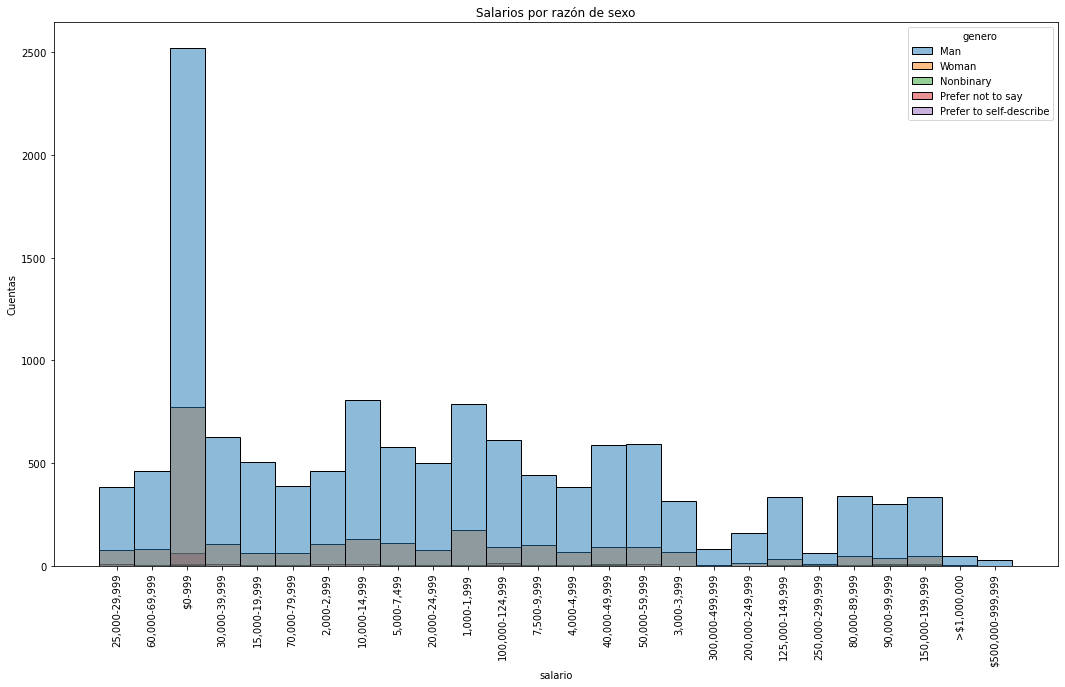

In [ ]:
#  Histograma seleccionando como varaible semantica la variable isla y  un total de 20 bins
plt.figure(figsize =(18,10))
plt.xticks(rotation='vertical')
fig = sns.histplot(x='salario', data = df_new,hue = 'genero')
fig.set(xlabel='salario', ylabel = 'Cuentas')
fig.set_title('Salarios por razón de sexo')
plt.show()


In [ ]:
#necesito que los rangos de salario sean numéricos
plt.figure(figsize =(8,4))
fig = sns.boxplot(x= 'salario', y ='genero', data = df_new)
fig.set(xlabel='Isla', ylabel= 'Longitud de la aleta en mm')
fig.set_title('Boxplot de la longitud de la aleta en mm por isla')
plt.show()


# Boxplot por vertical, por isla
plt.figure(figsize =(8,4))
fig = sns.boxplot(x= 'salario', y ='genero',hue= 'genero', data = df_new)
fig.set(xlabel='Isla', ylabel= 'Longitud de la aleta en mm por isla y sexo' )
fig.set_title('Boxplot de la longitud de la aleta')
plt.show()

In [ ]:
#función para hacer los salarios un único valor
df_new["salario"].unique().mean()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [ ]:
df_new.head()

In [ ]:
df_new.salario.value_counts()

$0-999              3368
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          698
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: salario, dtype: int64

In [ ]:
def mensual();

    col_salario_mensual= (1,000-1,999 ,1,000-1,999 .1,000-1,999 )
    df_salario_separado = (df_new["salario"].str.split('-', n=-1, expand= True), columns = ['salario_separado_1', 'salario_separado_2'])
    (salario 1 + salario 2)/2 #media

def_new.salario = def_new.salario.apply(mensual)

    col_salario_mensual= (1,000-1,999 ,1,000-1,999 .1,000-1,999 )
    df_salario_separado = (df_new["salario"].str.split('-', n=-1, expand= True), columns = ['salario_separado_1', 'salario_separado_2'])
    (salario 1 + salario 2)/12 #media

def anual()

In [ ]:
import sidetable 

frecuencia = df_new.stb.freq(['salario'])
frecuencia

<AxesSubplot:>

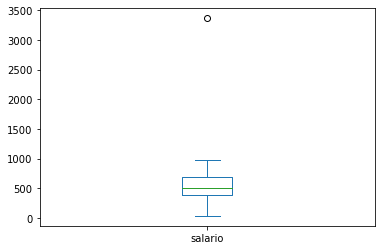

In [ ]:
df_new['salario'].value_counts().plot(kind='box')

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_new['salario'], df_new['genero'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

In [ ]:
df_new.salario.value_counts()

In [ ]:
#Crear 2 columnas en el data frame con los valores sseparados para despues poder sumar y dividir para tener la media de salario y crear una columna unic
df_salario_separado = (df_new["salario"].str.split('-', n=-1, expand= True), columns = ['salario_separado_1', 'salario_separado_2'])
df_salario_separado.head(2)

In [ ]:
# df_new["salario_separado_1"], df_new["salario_separado_2"] = df_new["salario"].str.split('-', n=-1, expand= True)
df_new["salario_separado_1"]

0        0
1        0
2        0
3        0
4        0
        ..
25968    0
25969    0
25970    0
25971    0
25972    0
Name: salario_separado_1, Length: 25973, dtype: int64

# Poner la funcion de eliminacion de outliers 

# Contear los nulos, me los quedo ? no me los quedo?


In [ ]:
#Alicia

In [ ]:
df_new.dtype

- Identificamos el número de nulos por columna

In [ ]:
nulos = pd.DataFrame((df_new.isnull().sum() * 100) / df_new.shape[0]).reset_index()
nulos.columns = ["columna", "porcentaje"]
nulos

Tenemos mas de una columna con más del 50% de los datos nulos, pero anteriormente en la elección de columnas hemos decidido quedarnoslo, por lo que ahora no tendría mucho sentido eliminar esas columnas.

Como todas las variables son categoricas reemplazariamos los nulos por la moda o por algun str. Por ejemplo: 'Unknown'

In [ ]:
df_new_categoricas = df_new.select_dtypes(include = 'object')

In [ ]:
#Podria la moda en los que tengan menor porcentaje de nulos

In [ ]:
for i in df_new_categoricas:
    df_new_categoricas[i].fillna(df_new_categoricas.mode()inplace = True)

In [ ]:
#Para el resto de variables

In [ ]:
for i in df_new_categoricas:
    df_new_categorica[i].replace(np.nan, 'Unknow', inplace=True)

# Ver mediana, moda, media, bla bla, hablar un poco de eso

# Columnas numericas o categoricas

# codificacion de las variables categoricas (nominales,ordinales)

# Normalizacion y estandarizacion 

In [ ]:
#Olivia

<font color='skyblue'> Función para ver estadístos. Misma función para todas las variables numéricas. Habrá que llamarla con la columna tantas veces como columnas queramos consultar.

In [ ]:
def estadisticos(x):
    
    media = np.mean(df_new[x])
    print('La media de', x, 'es de:', media) 
    
    mediana = np.median(df_new[x])
    print('La mediana de', x, 'es:', mediana)

    moda, frecuencia = stats.mode(df_new[x])
    print('La moda de', x, 'es:', moda,'y la frecuencia es:', frecuencia)

    minimo = np.min(df_new[x])
    print('El valor mínimo de', x, 'es:', minimo)

    maximo = np.max(df_new[x])
    print('El valor máximo de', x, 'es:', maximo)

In [ ]:
estadisticos()

<font color ='skyblue'> Variables numéricas y categóricas.

In [ ]:
numericas = df_new.select_dtypes(include = np.number)
numericas.head()

In [ ]:
categoricas = df_new.select_dtypes(include=[object])

<font color='skyblue'>Codificación de las variables categóricas. He elegido el label enconding porque como añun no sabemos qué variables queremos aún hay que elegirlas y limpiar las columnas, si es que hay algo que limpiar. Esta forma me parecía más sencilla pero si a alguien no le gusta se cambia en un pispás 🤓
(dejo planteado un ordinal encoding por si hay alguna variable que NO queramos que tenga una clasificación aleatoria.)

In [ ]:
#hay que poner esto arriba para que funcione
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
label_encoded_df = df_new.copy()

In [ ]:
le = LabelEncoder()

In [ ]:
for col in label_encoded_df.select_dtypes(include='object').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

In [ ]:
label_encoded_df.head()

<font color = 'sky blue'>Aquí dejo planteado el encoding para ordinales

In [ ]:
#df_new[columna_ordinal].unique()
#orden = [ AQUI INTRODUCIMOS LOS VALORES ÚNICOS DEL .unique DE ANTES EN EL ORDEN QUE QUERAMOS]

In [ ]:
# def ordinal_encoder(df, columna, orden_valores):
     
#     ordinal = OrdinalEncoder(categories = [orden], dtype = int)

#     transformados = ordinal.fit_transform(df[[columna]])
    
#     transformados_df = pd.DataFrame(transformados)

#     transformados_df.columns = ordinal.nombres_nuevos
    
#     df_new[columna] = transformados_df
     
#     return df

<font color = 'skyblue'> NORMALIZACIÓN

<font color = 'skyblue'>

Voy a usar directamente el boxcox para asegurarnos de que tenemos nuestra campana de Gauss como tiene que ser.

(y porque me gusta decir boxcox 🙃)

In [ ]:
from scipy import stats

In [ ]:
numericas[la_columna_que_queramos], lambda_ajustada = stats.boxcox(numericas['SalePrice'])

In [ ]:
numericas.head()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('columna original')
axes[1].set_title('columna normalizada')

sns.distplot(numericas['nombre_columna'] ,ax = axes[0])
sns.distplot(numericas['nombre_columna_normalizada'], ax = axes[1]);

<font color = 'skyblue'> ESTANDARIZACIÓN

He elegido el RobustSkaler para que los outliers afecten lo menos posible. Lo mismo, si no os convence se cambia :)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
robust = RobustScaler()

In [ ]:
robust.fit(numericas)

In [ ]:
x_robust = robust.transform(numericas)

In [ ]:
numericas_robust = pd.DataFrame(x_robust, columns = numericas.columns)
numericas_robust.head()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('columna original')
axes[1].set_title('columna estandarizada')

sns.distplot(numericas['columna'] ,ax = axes[0])
sns.distplot(numericas['columna_nueva_con_la_estandarización'], ax = axes[1]);

# **Gráficas**

# Conclusiones (opcional)